In [2]:
import js

# Access the navigator object to get browser information
user_agent = js.navigator.userAgent
platform = js.navigator.platform
language = js.navigator.language

# Print browser information
print("User Agent:", user_agent)
print()
print("Platform:", platform)
print()
print("Language:", language)
print()




User Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36

Platform: Win32

Language: en-US



In [3]:
import piplite
await piplite.install("ase")
await piplite.install("intermat")

Source: https://linuxtut.com/en/dd9c3ed201ce2eac4757/
Let's perform MD simulation of Ni crystal using ʻase.md` module of ASE (Atomic Simulation Environment).

In [4]:
# Create a bulk model of Ni (fcc).

import numpy as np
from ase.build import bulk
from ase.build.supercells import make_supercell
from ase.calculators.emt import EMT

#Ni bulk
Ni_bulk= bulk('Ni', 'fcc', a=3.5, cubic=True) 

#Superlattice
Ni_bulk = make_supercell(Ni_bulk, np.diag([3., 3., 3.]))

#Use EMT
Ni_bulk.set_calculator(EMT())

<ipython-input-4-24e963a15ad2>:15: DeprecationWarning: Please use atoms.calc = calc
  Ni_bulk.set_calculator(EMT())


In [5]:
from ase import units
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution

dt = 2 * units.fs
temp0, nsteps0 = 10, 200
temp1, nsteps1 = 500, 400
taut = 20*units.fs
    
MaxwellBoltzmannDistribution(Ni_bulk, temp0*units.kB)
dyn = NVTBerendsen(Ni_bulk, dt, temp0, taut=taut, trajectory='md.traj')
def myprint():
    print(f'time={dyn.get_time() / units.fs: 5.0f} fs ' + \
          f'T={Ni_bulk.get_temperature(): 3.0f} K')
dyn.attach(myprint, interval=20)

/lib/python3.12/site-packages/ase/md/md.py:53: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


In [6]:
# Run MD simulation
dyn.run(nsteps0)

#Raise the temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)

time=    0 fs T= 11 K
time=   40 fs T=  6 K
time=   80 fs T=  8 K
time=  120 fs T=  9 K
time=  160 fs T= 12 K
time=  200 fs T= 10 K
time=  240 fs T=  8 K
time=  280 fs T= 12 K
time=  320 fs T=  8 K
time=  360 fs T=  9 K
time=  400 fs T= 12 K
time=  440 fs T= 191 K
time=  480 fs T= 285 K
time=  520 fs T= 383 K
time=  560 fs T= 537 K
time=  600 fs T= 637 K
time=  640 fs T= 480 K
time=  680 fs T= 471 K
time=  720 fs T= 505 K
time=  760 fs T= 524 K
time=  800 fs T= 436 K
time=  840 fs T= 539 K
time=  880 fs T= 519 K
time=  920 fs T= 494 K
time=  960 fs T= 487 K
time= 1000 fs T= 511 K
time= 1040 fs T= 524 K
time= 1080 fs T= 484 K
time= 1120 fs T= 441 K
time= 1160 fs T= 548 K
time= 1200 fs T= 504 K


True

MovieWriter imagemagick unavailable; using Pillow instead.


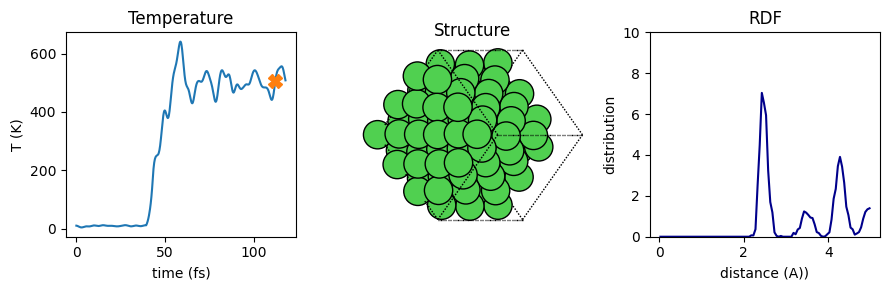

In [16]:
%matplotlib inline 

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ase.visualize.plot import plot_atoms
from ase.io.trajectory import Trajectory
from ase.geometry.analysis import Analysis

traj =  Trajectory('md.traj')

fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20

def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)
    
    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t[:-1], temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)
    
    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')
    
    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')

ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani.gif', writer="imagemagick")